In [2]:
import pandas as pd  # Untuk manipulasi data berbasis tabel (DataFrame).
import numpy as np  # Untuk operasi numerik dan array.
import matplotlib.pylab as plt  # Untuk visualisasi data dasar.
import seaborn as sns  # Untuk visualisasi data statistik.
import plotly.express as px  # Untuk visualisasi interaktif.

from sklearn.preprocessing import StandardScaler  # Untuk normalisasi fitur.
from sklearn.model_selection import train_test_split  # Untuk membagi data latih dan uji.
from sklearn.tree import DecisionTreeClassifier  # Untuk model klasifikasi pohon keputusan.
from sklearn.metrics import accuracy_score, classification_report  # Untuk evaluasi performa model.



#1. Import data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/latihan/latihan/obesitas_tree/obesitas_tree.csv', index_col=0)
df

,Jenis Kelamin,Tinggi Badan,Berat Badan,Label
0,Laki laki,174,96,4
1,Laki laki,189,87,2
2,Perempuan,185,110,4
3,Perempuan,195,104,3
4,Laki laki,149,61,3
...,...,...,...,...
495,Perempuan,150,153,5
496,Perempuan,184,121,4
497,Perempuan,141,136,5
498,Laki laki,150,95,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Jenis Kelamin  500 non-null    object
 1   Tinggi Badan   500 non-null    int64 
 2   Berat Badan    500 non-null    int64 
 3   Label          500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 19.5+ KB


In [5]:
df.shape

(500, 4)

In [6]:
df.Label.value_counts()

,count
Label,
5,198
4,130
2,69
3,68
1,22
0,13


#2. Cleaning Data

In [7]:
df.isnull().sum()

,0
Jenis Kelamin,0
Tinggi Badan,0
Berat Badan,0
Label,0


In [8]:
df.duplicated().sum()

11

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(489, 4)

#3. Exploratory Data Analysis (EDA)


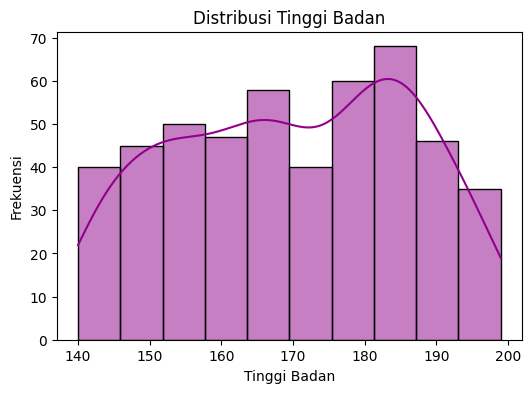

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Tinggi Badan', bins=10, kde=True, color='#91008a')

plt.title('Distribusi Tinggi Badan')
plt.xlabel('Tinggi Badan')
plt.ylabel('Frekuensi')
plt.show()

In [12]:
fig=px.sunburst(df,path=['Jenis Kelamin', 'Label'], values=df.value_counts().values,color_discrete_sequence=['#2BCDC1','#F66095'])
fig.show()

#4. Preparation

In [13]:
from sklearn.preprocessing import LabelEncoder

jk_encoder = LabelEncoder()

df['Jenis Kelamin'] = jk_encoder.fit_transform(df['Jenis Kelamin']) #fit = pelajari data unikmuya

<ipython-input-13-1206f55e0e72>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
df.head()

,Jenis Kelamin,Tinggi Badan,Berat Badan,Label
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [15]:
x = df.drop(columns=['Label'])
y = df['Label']

print("x : ",x.shape)
print("y : ",y.shape)

x :  (489, 3)
y :  (489,)


In [16]:
#standarisasi
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#5.Modeling & Evaluation

In [18]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

decision_tree_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Akurasi Model Decision Tree: {: 2f}%'.format(decision_tree_acc*100))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.50      0.50         2
           2       0.76      0.87      0.81        15
           3       0.60      0.67      0.63         9
           4       0.86      0.74      0.79        34
           5       0.87      0.94      0.91        36

    accuracy                           0.82        98
   macro avg       0.77      0.70      0.72        98
weighted avg       0.82      0.82      0.81        98

Akurasi Model Decision Tree:  81.632653%


#6. Testing

In [20]:
new_data = pd.DataFrame({
            'Jenis Kelamin': ["Perempuan"],
            'Tinggi Badan': [168],
            'Berat Badan': [200]
            })

In [21]:
new_data ['Jenis Kelamin'] = jk_encoder.transform(new_data['Jenis Kelamin'])

In [22]:
new_data_scaled = scaler.transform(new_data)
prediction = clf.predict(new_data_scaled)
print("Prediksi BMI:", prediction[0])

Prediksi BMI: 5
